<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
#!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
#!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [7]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [9]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
import pandas as pd

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [11]:
# I definitely don't need data from aisles or departments,
# I think most of it going to come from order_products, orders, and products
# First lets start by getting the data into dataframes
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), pd.read_csv('order_products__train.csv')])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
# Actually, I don't think I need this data

products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
# Okay, so now to drop everything I think I don't need
# I only need to know the product names and their corrosponding ids,
# from there I can create a subset of order_products that only contains orders containing those products
# and from there get the counts of each one.
top_ten_names = [
                 'Banana',
                 'Bag of Organic Bananas',
                 'Organic Strawberries',
                 'Organic Baby Spinach',
                 'Organic Hass Avocado',
                 'Organic Avocado',
                 'Large Lemon',
                 'Strawberries',
                 'Limes',
                 'Organic Whole Milk'
]

condition = products.product_name.isin(top_ten_names)

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [15]:
# Perfect, so now we have the associated ids for the products, so now we can create another subset
# of order_products this time to get every time the products, given by their ids, were ordered
condition = order_products.product_id.isin(products_subset.product_id)

order_products_subset = order_products[condition]

print(order_products_subset.shape)
order_products_subset.head(10)

(2418314, 4)


,order_id,product_id,add_to_cart_order,reordered
12,3,21903,4,1
30,5,13176,1,1
51,5,47209,22,0
77,10,24852,1,1
80,10,47766,4,1
83,10,21137,7,1
126,14,27845,2,1
170,18,47766,27,1
180,20,24852,6,0
190,22,24852,3,1


In [16]:
# Oh yeah, that looks good.
# Alright, final step: get a list of counts for each specific id

order_products_subset.product_id.value_counts()

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [17]:
# Cool, and the indexes for these counts are the product ids, too.

# Reset index to grab the product ids and save it
product_counts = order_products_subset.product_id.value_counts().reset_index()

# Match the columns to merge with the final dataframe
product_counts.columns = ['product_id', 'count']

product_counts

,product_id,count
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [18]:
# Grab everything we need from products_subset, 
final = products_subset[['product_id', 'product_name']]

# Merge the product counts with their respective ids
final = pd.merge(final, product_counts, on='product_id')

# Some housekeeping
final = final.drop('product_id', axis=1).sort_values(by="count", ascending=False)

final

,product_name,count
4,Banana,491291
0,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
7,Organic Hass Avocado,220877
9,Organic Avocado,184224
8,Large Lemon,160792
1,Strawberries,149445
5,Limes,146660
6,Organic Whole Milk,142813


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [19]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [20]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [21]:
tidy = table2.melt(id_vars='index', value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [22]:
# Honestly, I'm surprised that worked as well as it did

# tidy -> table2
wide = tidy.pivot_table(index='index', columns='variable', values='value')
wide

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [23]:
# Seaborn Pivot Table
import seaborn as sns
flights = sns.load_dataset('flights')

flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [24]:
# Flights Pivot Table
pivot = flights.pivot_table(index='year',
                            columns='month',
                            values='passengers')

pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


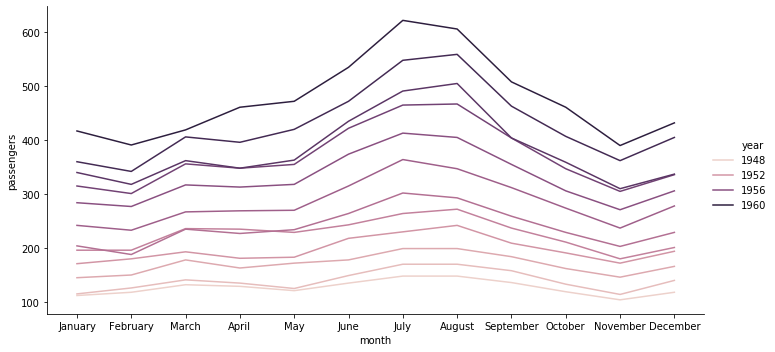

In [25]:
# Extra graphs: various visualizations of the flights data

sns.relplot(x="month",
            y="passengers",
            hue="year",
            data=flights,
            kind='line',
            aspect=2);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [26]:
# Gonna re-print these so I know what I'm looking at
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [27]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [28]:
print(products.shape)
products.head(10)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [29]:
# I think I'll just start by merging orders and order_products and dropping the axes I don't need
orders_subset = pd.merge(order_products[['order_id', 'product_id']], orders[['order_id', 'order_hour_of_day']], on="order_id", how='inner')
print(orders_subset.shape)
orders_subset.head()

(33819106, 3)


,order_id,product_id,order_hour_of_day
0,2,33120,9
1,2,28985,9
2,2,9327,9
3,2,45918,9
4,2,30035,9


In [30]:
# Lets create a list where the indexes are the product ids and what's at those indexes is the name
# so we can basically just map the list to the ids
products_subset = products[['product_id','product_name']]
products_subset.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [31]:
final_orders = pd.merge(orders_subset, products_subset, on="product_id", how="inner")
print(final_orders.shape)
final_orders.head(10)

(33819106, 4)


,order_id,product_id,order_hour_of_day,product_name
0,2,33120,9,Organic Egg Whites
1,26,33120,16,Organic Egg Whites
2,120,33120,8,Organic Egg Whites
3,327,33120,9,Organic Egg Whites
4,390,33120,12,Organic Egg Whites
5,537,33120,8,Organic Egg Whites
6,582,33120,19,Organic Egg Whites
7,608,33120,21,Organic Egg Whites
8,623,33120,12,Organic Egg Whites
9,689,33120,13,Organic Egg Whites


In [0]:
# That's a lot of egg whites; but I think it worked the way I wanted it to
# I'm gonna grab the counts of every product for every hour

# Trying something
final_orders['blank'] = 1
final_orders.head()

final_counts_pivot = final_orders.pivot_table(index='product_name',
                                              columns='order_hour_of_day',
                                              values='blank',
                                              aggfunc='count',
                                              fill_value=0)

In [42]:
print(final_counts_pivot.shape)
final_counts_pivot.head(15)

(49685, 24)


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
product_name,,,,,,,,,,,,,,,,,,,,,,,,
#2 Coffee Filters,3,4,4,1,0,1,6,28,42,59,65,71,62,69,64,75,65,55,34,29,26,19,9,8
#2 Cone White Coffee Filters,0,0,0,0,0,0,0,1,1,4,2,0,0,0,2,1,1,0,1,0,1,0,0,0
#2 Mechanical Pencils,0,0,0,1,0,0,0,0,0,1,3,0,1,0,0,0,2,0,0,0,0,0,1,0
#4 Natural Brown Coffee Filters,3,0,0,0,0,0,0,8,19,26,26,35,21,16,19,14,18,9,8,8,8,5,3,1
& Go! Hazelnut Spread + Pretzel Sticks,0,0,0,0,0,0,4,4,11,19,16,10,17,13,12,12,12,22,5,6,3,6,2,0
'Swingtop' Premium Lager,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
(70% Juice!) Mountain Raspberry Juice Squeeze,1,0,0,0,0,0,2,2,3,1,3,3,2,2,2,3,3,0,0,0,0,0,0,1
+Energy Black Cherry Vegetable & Fruit Juice,0,0,0,0,0,0,0,2,1,5,2,3,4,1,1,3,1,0,2,4,1,0,0,0
".5\"" Waterproof Tape",1,1,0,0,0,0,0,0,0,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# Oh yeah, this is exactly what I wanted
# I need to use loc somehow to access the counts of items at specific times
# I don't know how to though.
final_counts_pivot.loc[]

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####